**Importing the libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from sklearn import metrics

**Loading the dataset**

In [2]:
data = pd.read_csv("spam.csv")

In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


**Exploring the data**

In [4]:
data.drop(data.columns[[2,3,4]],axis = 1,inplace = True)

In [5]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
data['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

In [8]:
data['v1'].unique()

array(['ham', 'spam'], dtype=object)

**Data Visualization(Ham vs Spam)**

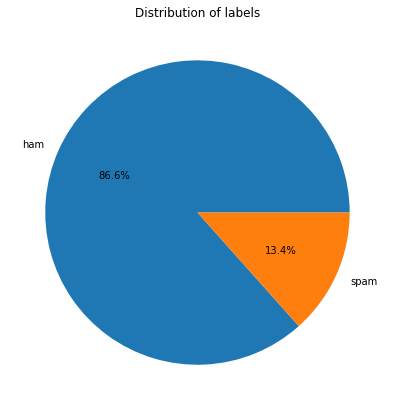

In [9]:
classification = list(data['v1'].unique())

fig = plt.figure(figsize = (10,7))
plt.pie(data['v1'].value_counts(), labels = classification, autopct = '%1.1f%%')

plt.title('Distribution of labels')

plt.show()

**Splitting the dataset into training and testing set**

In [10]:
X = data['v2']
y = data['v1']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

**Logistic Regression**

In [12]:
regressor = Pipeline([('tfidf',TfidfVectorizer()),('reg', LogisticRegression())])

In [13]:
regressor.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('reg', LogisticRegression())])

In [14]:
reg_pred = regressor.predict(X_test)

**Model evaluation**

In [15]:
print(metrics.accuracy_score(reg_pred, y_test))

0.9659192825112107


In [16]:
df = pd.DataFrame(metrics.confusion_matrix(y_test, reg_pred), index = ['ham','spam'], columns = ['ham','spam'])
df

,ham,spam
ham,964,1
spam,37,113


**Naive Bayes Classifier**

In [17]:
naive_classifier = Pipeline([('tfidf',TfidfVectorizer()),('mnb',MultinomialNB())])

In [18]:
naive_classifier.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('mnb', MultinomialNB())])

In [19]:
pred_naive = naive_classifier.predict(X_test)

**Model evaluation**

In [20]:
df = pd.DataFrame(metrics.confusion_matrix(y_test, pred_naive), index = ['ham','spam'], columns = ['ham','spam'])

In [21]:
df

,ham,spam
ham,965,0
spam,42,108


In [22]:
print(metrics.accuracy_score(y_test, pred_naive))

0.9623318385650225


**SVC Classifier**

In [23]:
classifier = Pipeline([('tfidf',TfidfVectorizer()),('classifier',LinearSVC())])

In [24]:
classifier.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('classifier', LinearSVC())])

In [25]:
svc_predictions = classifier.predict(X_test)

**Model evaluation**

In [26]:
df = pd.DataFrame(metrics.confusion_matrix(y_test, svc_predictions), index = ['ham','spam'], columns = ['ham','spam'])

In [27]:
df

,ham,spam
ham,963,2
spam,18,132


In [28]:
print(metrics.classification_report(y_test, svc_predictions))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.99      0.88      0.93       150

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [29]:
print(metrics.accuracy_score(y_test, svc_predictions))

0.9820627802690582


In [30]:
ex_msg_1 = "Hi Bob, how are you? I'll meet you at your home today. See you!!"

In [31]:
print(classifier.predict([ex_msg_1]))

['ham']


In [32]:
ex_msg_2 = "Click the link below to get an yearly subscription"

In [33]:
print(classifier.predict([ex_msg_2]))

['spam']


By analyzing the above models, the accuracy score of SVC Classifier is higher than the other two models and 
hence can conclude that SVC Classifier best suits for the chosen dataset